<a href="https://colab.research.google.com/github/Morganblabla/Estadistica/blob/main/ProblemarioU4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analiza los siguientes diseños experimentales, e intenta sacar el máximo valor a la información. Verifica los supuestos (linealidad, homscedasticidad e independencia), puedes apoyarte en [este documento](https://colab.research.google.com/drive/1VDWeVo0mZluvDAFcr5Vq6n3EdqW3EZaG?usp=sharing). Aplica una prueba post-hoc en caso que sea necesario. Redacta una conclusión y una recomendación para las personas que recolectaron los datos.

1. **Comparación de cuatro métodos de ensamble:** Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

| Método de ensamble | A  | B  | C  | D  |
|--------------------|----|----|----|----|
|                    | 6  | 7  | 11 | 10 |
|                    | 8  | 9  | 16 | 12 |
|                    | 7  | 10 | 11 | 11 |
|                    | 8  | 8  | 13 | 9  |


In [2]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

#PAULINA MORGAN JIMÈNEZ
import pandas as pd
from io import StringIO

datos = '''
metodo,tiempo
A,6
A,8
A,7
A,8
B,7
B,9
B,10
B,8
C,11
C,16
C,11
C,13
D,10
D,12
D,11
D,9
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# De aquí en adelante, ya se lo dejo a ustedes.

,metodo,tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


ANOVA

In [3]:
#PAULINA MORGAN JIMÈNEZ
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['metodo'] == 'A']['tiempo'],
    df[df['metodo'] == 'B']['tiempo'],
    df[df['metodo'] == 'C']['tiempo'],
    df[df['metodo'] == 'D']['tiempo']

)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 9.42
Valor p: 0.00177

Conclusión: Hay diferencias significativas entre al menos dos grupos.


TUKEY

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     1.25 0.6805 -2.0416 4.5416  False
     A      C      5.5 0.0016  2.2084 8.7916   True
     A      D     3.25 0.0533 -0.0416 6.5416  False
     B      C     4.25  0.011  0.9584 7.5416   True
     B      D      2.0 0.3181 -1.2916 5.2916  False
     C      D    -2.25 0.2309 -5.5416 1.0416  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

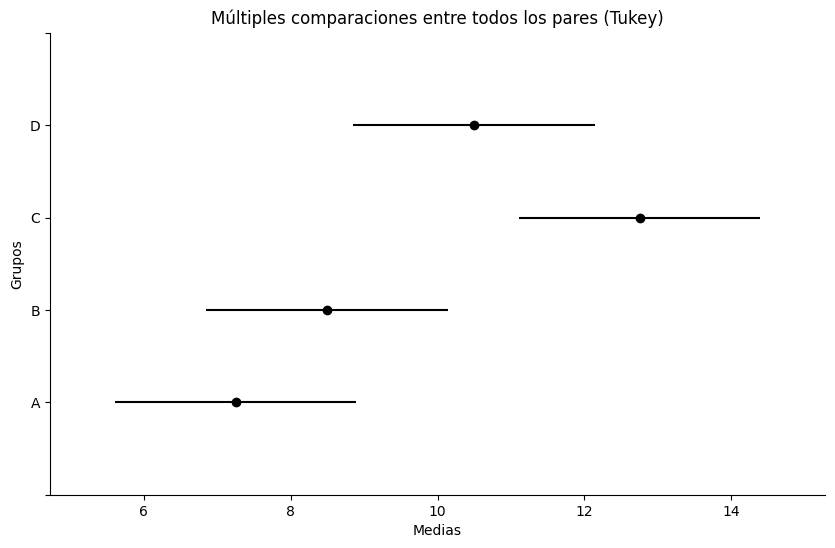

In [4]:
#PAULINA MORGAN JIMÈNEZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['metodo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusión: El grupo A y B no tienen una diferencia significativa entre si, mientras que C y D no tienen diferencia entre si, pero el grupo AB y CD tienen diferencias entre si. Se recomienda usar A y B.

2. **Comparación de cuatro tipos de cuero:** Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla.

| Tipo de cuero | Observaciones                  | Promedio |
|---------------|--------------------------------|----------|
| A             | 264, 260, 258, 241, 262, 255 | 256.7    |
| B             | 208, 220, 216, 200, 213, 206 | 209.8    |
| C             | 220, 263, 219, 225, 230, 228 | 230.8    |
| D             | 217, 226, 215, 227, 220, 222 | 220.7    |


In [5]:
#PAULINA MORGAN JIMÈNEZ
import pandas as pd
from io import StringIO

datos = '''
observaciones,promedio
A,264
A,260
A,258
A,241
A,262
A,255
B,208
B,220
B,216
B,200
B,213
B,206
C,220
C,263
C,219
C,225
C,230
C,228
D,217
D,226
D,215
D,227
D,220
D,222
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

,observaciones,promedio
0,A,264
1,A,260
2,A,258
3,A,241
4,A,262
5,A,255
6,B,208
7,B,220
8,B,216
9,B,200


ANOVA

In [6]:
#PAULINA MORGAN JIMÈNEZ
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['observaciones'] == 'A']['promedio'],
    df[df['observaciones'] == 'B']['promedio'],
    df[df['observaciones'] == 'C']['promedio'],
    df[df['observaciones'] == 'D']['promedio']

)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 22.76
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


TUKEY

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B -46.1667    0.0  -62.553 -29.7803   True
     A      C -25.8333 0.0014 -42.2197   -9.447   True
     A      D    -35.5    0.0 -51.8863 -19.1137   True
     B      C  20.3333 0.0118    3.947  36.7197   True
     B      D  10.6667 0.2926  -5.7197   27.053  False
     C      D  -9.6667 0.3743  -26.053   6.7197  False
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

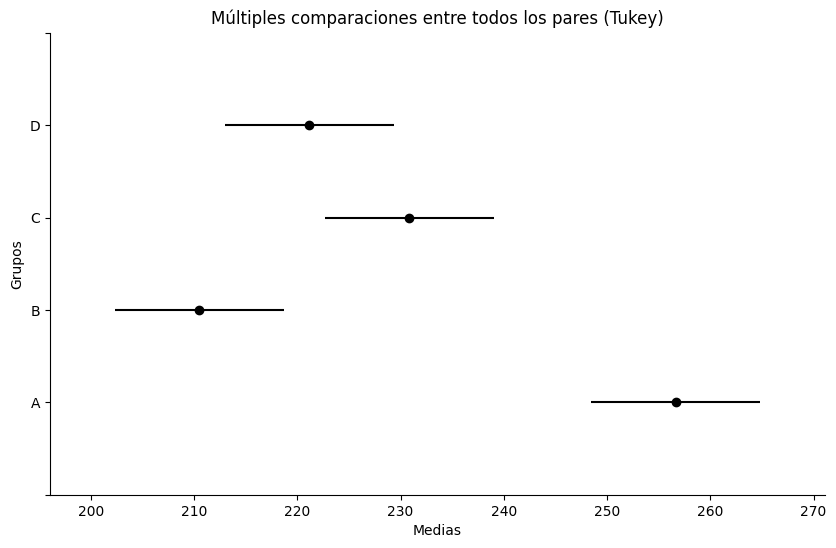

In [7]:
#PAULINA MORGAN JIMÈNEZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['promedio'], groups=df['observaciones'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusión: A tiene una diferencia muy significativa con todos los demás grupos. B no tiene diferencia significativa con D, pero si con C. C no tiene mucha diferencia con D, pero si con A. D no tiene mucha diferencia con B y C. Se recomienda B y C, por menor desgaste, pero sobre todo B. Evitar A.

3. En un centro de investigación se realiza un estudio para comparar varios tratamientos que, al aplicarse previamente a los frijoles crudos, reducen su tiempo de cocción. Estos tratamientos son a base de bicarbonato de sodio y cloruro de sodio o sal común. El primer tratamiento ($T_1$) es el de control, que consiste en no aplicar ningún tratamiento. El tratamiento $T_2$ es el remojo en agua con bicarbonato de sodio, el $T_3$ es remojar en agua con sal común y el $T_4$ es remojar en agua con una combinación de ambos ingredientes en proporciones iguales. La variable de respuesta es el tiempo de cocción en minutos. Los datos se muestran en la siguiente tabla:

| $T_1$ | $T_2$  | $T_3$  | $T_4$  |
|---------|-----|-----|-----|
| 213     | 76  | 57  | 84  |
| 214     | 85  | 67  | 82  |
| 204     | 74  | 55  | 85  |
| 208     | 78  | 64  | 92  |
| 212     | 82  | 61  | 87  |
| 200     | 75  | 63  | 79  |
| 207     | 82  | 63  | 90  |



In [8]:
#PAULINA MORGAN JIMÈNEZ
import pandas as pd
from io import StringIO

datos = '''
observaciones,promedio
T1,213
T1,214
T1,204
T1,208
T1,212
T1,200
T1,207
T2,76
T2,85
T2,74
T2,78
T2,82
T2,75
T2,82
T3, 61
T3, 63
T3, 63
T4, 84
T4, 82
T4, 85
T4, 92
T4, 87
T4, 79
T4, 90

'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df

,observaciones,promedio
0,T1,213
1,T1,214
2,T1,204
3,T1,208
4,T1,212
5,T1,200
6,T1,207
7,T2,76
8,T2,85
9,T2,74


ANOVA

In [9]:
#PAULINA MORGAN JIMÈNEZ
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['observaciones'] == 'T1']['promedio'],
    df[df['observaciones'] == 'T2']['promedio'],
    df[df['observaciones'] == 'T3']['promedio'],
    df[df['observaciones'] == 'T4']['promedio']

)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 1454.99
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


TUKEY

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    T1     T2 -129.4286    0.0 -136.0069 -122.8503   True
    T1     T3 -145.9524    0.0 -154.4449 -137.4599   True
    T1     T4 -122.7143    0.0 -129.2926  -116.136   True
    T2     T3  -16.5238 0.0001  -25.0163   -8.0313   True
    T2     T4    6.7143 0.0444     0.136   13.2926   True
    T3     T4   23.2381    0.0   14.7456   31.7306   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

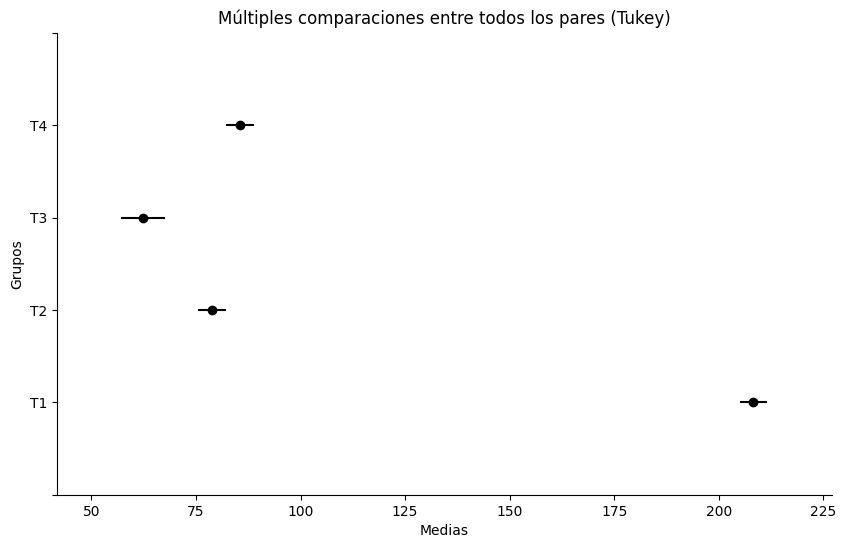

In [10]:
#PAULINA MORGAN JIMÈNEZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['promedio'], groups=df['observaciones'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

Conclusión: Existe una gran diferencia entre todos los tratamientos, sobre tofo con el T1. Se recomienda usar el 3, ya que necesita menos tiempo de cocción.

4. Para estudiar la confiabilidad de ciertos tableros electrónicos para carros, se someten a un envejecimiento acelerado durante 100 horas a determinada temperatura, y como variable de interés se mide la intensidad de corriente que circula entre dos puntos, cuyos valores aumentan con el deterioro. Se probaron 20 módulos repartidos de manera equitativa en cinco temperaturas y los resultados obtenidos fueron los siguientes:

| 20°C | 40°C | 60°C | 80°C | 100°C |
|------|------|------|------|-------|
| 15   | 17   | 23   | 28   | 45    |
| 18   | 21   | 19   | 32   | 51    |
| 13   | 11   | 25   | 34   | 57    |
| 12   | 16   | 22   | 31   | 48    |


In [22]:
#PAULINA MORGAN JIMÈNEZ
import pandas as pd
from io import StringIO

datos = '''
temperatura,intensidad
20,15
20,18
20,13
20,12
40,17
40,21
40,11
40,16
60,23
60,19
60,25
60,22
80,28
80,32
80,34
80,31
100,45
100,51
100,57
100,48
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df


,temperatura,intensidad
0,20,15
1,20,18
2,20,13
3,20,12
4,40,17
5,40,21
6,40,11
7,40,16
8,60,23
9,60,19


In [23]:
#PAULINA MORGAN JIMÈNEZ
# ANOVA
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['temperatura'] == 20]['intensidad'],
    df[df['temperatura'] == 40]['intensidad'],
    df[df['temperatura'] == 60]['intensidad'],
    df[df['temperatura'] == 80]['intensidad'],
    df[df['temperatura'] == 100]['intensidad']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 68.05
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    20     40     1.75 0.9535 -5.9801  9.4801  False
    20     60     7.75 0.0493  0.0199 15.4801   True
    20     80    16.75 0.0001  9.0199 24.4801   True
    20    100    35.75    0.0 28.0199 43.4801   True
    40     60      6.0 0.1696 -1.7301 13.7301  False
    40     80     15.0 0.0002  7.2699 22.7301   True
    40    100     34.0    0.0 26.2699 41.7301   True
    60     80      9.0 0.0191  1.2699 16.7301   True
    60    100     28.0    0.0 20.2699 35.7301   True
    80    100     19.0    0.0 11.2699 26.7301   True
----------------------------------------------------


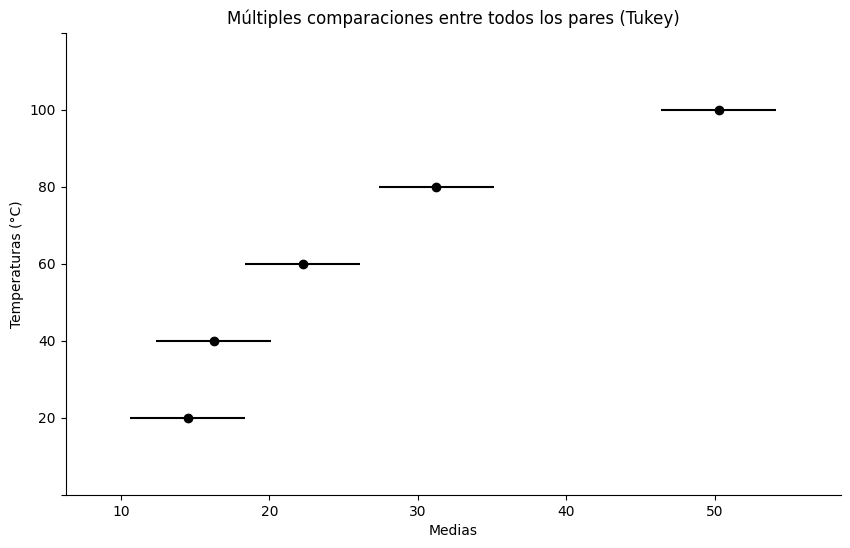

In [24]:
#PAULINA MORGAN JIMÈNEZ
# Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

tukey = pairwise_tukeyhsd(endog=df['intensidad'], groups=df['temperatura'], alpha=nivel_de_significancia)

# Mostrar resultados
print(tukey)

# Gráfico
tukey.plot_simultaneous(ylabel="Temperaturas (°C)", xlabel="Medias")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
plt.show()


Conclusión: Existen diferencias significativas en la intensidad de corriente entre varias temperaturas, especialmente entre las temperaturas más bajas (20 °C, 40 °C) y las más altas (80 °C, 100 °C). A medida que la temperatura aumenta, también lo hace la intensidad de corriente, lo cual indica mayor deterioro del componente electrónico. Por lo tanto, se concluye que la temperatura tiene un efecto significativo en la degradación del sistema.

5. En una empresa de manufactura se propone un tratamiento para reducir el porcentaje de productos defectuosos. Para validar esta propuesta se diseñó un experimento en el que se producía con o sin la propuesta de mejora. Cada corrida experimental consistió en producir un lote y la variable de respuesta es el porcentaje de producto defectuoso. Se hicieron 25 réplicas para cada tratamiento. Los datos obtenidos se muestran a continuación:

| Tratamiento     | Porcentaje de producto defectuoso                                     |
|-----------------|----------------------------------------------------------------------|
| Con tratam.     | 5.3, 4.0, 4.0, 4.0, 2.6, 2.1, 5.1, 4.1, 4.1, 3.2, 5.1, 2.2, 4.1     |
| Sin tratam.     | 8.0, 13.2, 7.2, 8.2, 9.1, 6.7, 12.6, 16.3, 9.2, 6.4, 7.2, 17.2, 12.3 |


In [25]:
# PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO

datos = '''
tratamiento,defectuosos
Con,5.3
Con,4.0
Con,4.0
Con,4.0
Con,2.6
Con,2.1
Con,5.1
Con,4.1
Con,4.1
Con,3.2
Con,5.1
Con,2.2
Con,4.1
Con,3.5
Con,3.8
Con,3.9
Con,2.9
Con,2.7
Con,3.0
Con,2.3
Con,4.2
Con,3.4
Con,4.0
Con,2.8
Con,3.1
Sin,8.0
Sin,13.2
Sin,7.2
Sin,8.2
Sin,9.1
Sin,6.7
Sin,12.6
Sin,16.3
Sin,9.2
Sin,6.4
Sin,7.2
Sin,17.2
Sin,12.3
Sin,10.4
Sin,14.2
Sin,13.3
Sin,11.1
Sin,9.8
Sin,15.5
Sin,8.9
Sin,11.4
Sin,13.5
Sin,10.9
Sin,12.8
Sin,14.1
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df


,tratamiento,defectuosos
0,Con,5.3
1,Con,4.0
2,Con,4.0
3,Con,4.0
4,Con,2.6
5,Con,2.1
6,Con,5.1
7,Con,4.1
8,Con,4.1
9,Con,3.2


In [26]:
# PAULINA MORGAN JIMÉNEZ
# ANOVA
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['tratamiento'] == 'Con']['defectuosos'],
    df[df['tratamiento'] == 'Sin']['defectuosos']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("Conclusión: No hay diferencias significativas entre los tratamientos.")


Resultados del ANOVA:
F-Estadístico: 140.18
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre los tratamientos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   Con    Sin      7.6   0.0 6.3094 8.8906   True
-------------------------------------------------


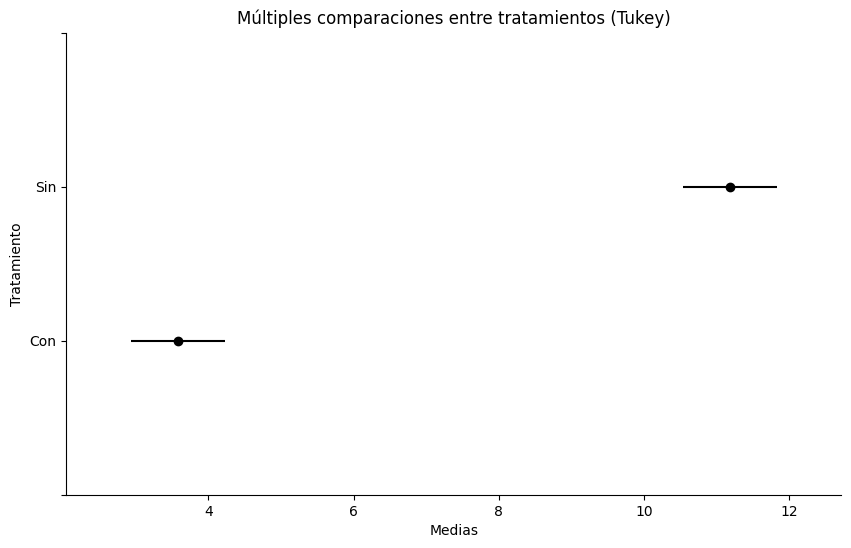

In [27]:
# PAULINA MORGAN JIMÉNEZ
# Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

tukey = pairwise_tukeyhsd(endog=df['defectuosos'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar resultados
print(tukey)

# Gráfico
tukey.plot_simultaneous(ylabel="Tratamiento", xlabel="Medias")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("Múltiples comparaciones entre tratamientos (Tukey)")
plt.show()


Conclusión: Existe una diferencia significativa entre los dos tratamientos: el porcentaje de productos defectuosos es menor cuando se aplica el tratamiento propuesto (Con tratamiento) en comparación con no aplicarlo (Sin tratamiento). Esto indica que la propuesta es efectiva para reducir el porcentaje de productos defectuosos en el proceso de manufactura.

6. Una compañía farmacéutica desea evaluar el efecto que tiene la cantidad de almidón en la dureza de las tabletas. Se decidió producir lotes con una cantidad determinada de almidón, y que las cantidades de almidón a aprobar fueran 2%, 5% y 10%. La variable de respuesta sería el promedio de la dureza de 20 tabletas de cada lote. Se hicieron 4 réplicas por tratamiento y se obtuvieron los siguientes resultados:

| % de almidón | Dureza               |
|--------------|----------------------|
| 2            | 4.3, 5.2, 4.8, 4.5  |
| 5            | 6.5, 7.3, 6.9, 6.1  |
| 10           | 9.0, 7.8, 8.5, 8.1  |


In [28]:
# PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO

datos = '''
almidon,dureza
2,4.3
2,5.2
2,4.8
2,4.5
5,6.5
5,7.3
5,6.9
5,6.1
10,9.0
10,7.8
10,8.5
10,8.1
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df


,almidon,dureza
0,2,4.3
1,2,5.2
2,2,4.8
3,2,4.5
4,5,6.5
5,5,7.3
6,5,6.9
7,5,6.1
8,10,9.0
9,10,7.8


In [29]:
#PAULINA MORGAN JIMÉNEZ
import scipy.stats as stats

nivel_de_significancia = 0.05

anova_result = stats.f_oneway(
    df[df['almidon'] == 2]['dureza'],
    df[df['almidon'] == 5]['dureza'],
    df[df['almidon'] == 10]['dureza']
)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")


Resultados del ANOVA:
F-Estadístico: 58.10
Valor p: 0.00001

Conclusión: Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     2      5      2.0 0.0006 1.0532 2.9468   True
     2     10     3.65    0.0 2.7032 4.5968   True
     5     10     1.65 0.0023 0.7032 2.5968   True
--------------------------------------------------


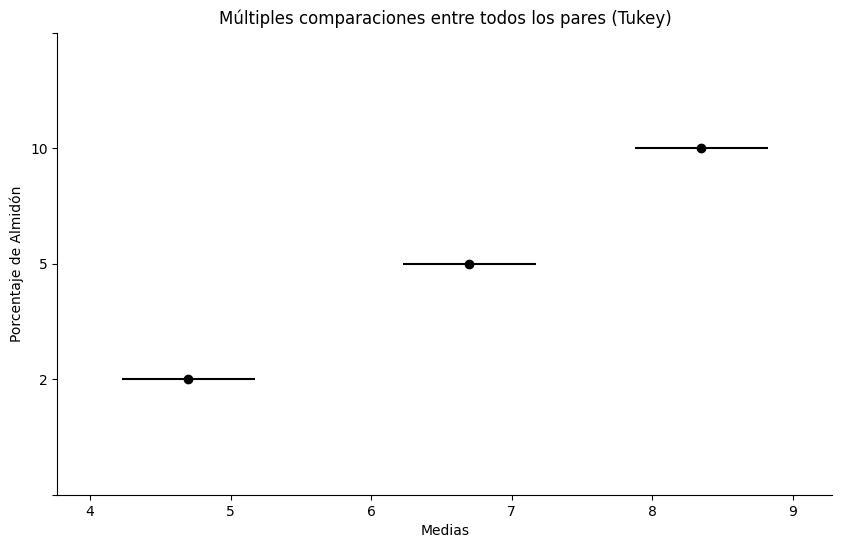

In [30]:
#PAULINA MORGAN JIMÉNEZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

tukey = pairwise_tukeyhsd(endog=df['dureza'], groups=df['almidon'], alpha=nivel_de_significancia)

print(tukey)

tukey.plot_simultaneous(ylabel="Porcentaje de Almidón", xlabel="Medias")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
plt.show()


Conclusión: Existen diferencias significativas en la dureza de las tabletas entre las cantidades de almidón del 2%, 5% y 10%. A medida que aumenta el porcentaje de almidón, también aumenta la dureza promedio de las tabletas. Por lo tanto, la cantidad de almidón tiene un efecto significativo en la dureza, y aumentar el porcentaje de almidón mejora la resistencia de las tabletas.

7. Los datos que se presentan enseguida son rendimientos en toneladas por hectárea de un pasto con tres niveles de fertilización nitrogenada. El diseño fue completamente aleatorizado, con cinco repeticiones por tratamiento.

| Niveles de nitrógeno | Rendimientos (ton/ha)       |
|-----------------------|----------------------------|
| 1                     | 14.823, 14.676, 14.720, 14.5141, 15.065 |
| 2                     | 25.151, 25.401, 25.131, 25.031, 25.267 |
| 3                     | 32.605, 32.460, 32.256, 32.669, 32.111 |


In [31]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO

datos = '''
nitrogeno,rendimiento
1,14.823
1,14.676
1,14.720
1,14.5141
1,15.065
2,25.151
2,25.401
2,25.131
2,25.031
2,25.267
3,32.605
3,32.460
3,32.256
3,32.669
3,32.111
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df


,nitrogeno,rendimiento
0,1,14.8230
1,1,14.6760
2,1,14.7200
3,1,14.5141
4,1,15.0650
5,2,25.1510
6,2,25.4010
7,2,25.1310
8,2,25.0310
9,2,25.2670


In [32]:
# PAULINA MORGAN JIMÉNEZ
import scipy.stats as stats

nivel_de_significancia = 0.05

anova_result = stats.f_oneway(
    df[df['nitrogeno'] == 1]['rendimiento'],
    df[df['nitrogeno'] == 2]['rendimiento'],
    df[df['nitrogeno'] == 3]['rendimiento']
)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")


Resultados del ANOVA:
F-Estadístico: 10131.62
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  10.4366   0.0 10.1038 10.7694   True
     1      3  17.6606   0.0 17.3278 17.9934   True
     2      3    7.224   0.0  6.8912  7.5568   True
---------------------------------------------------


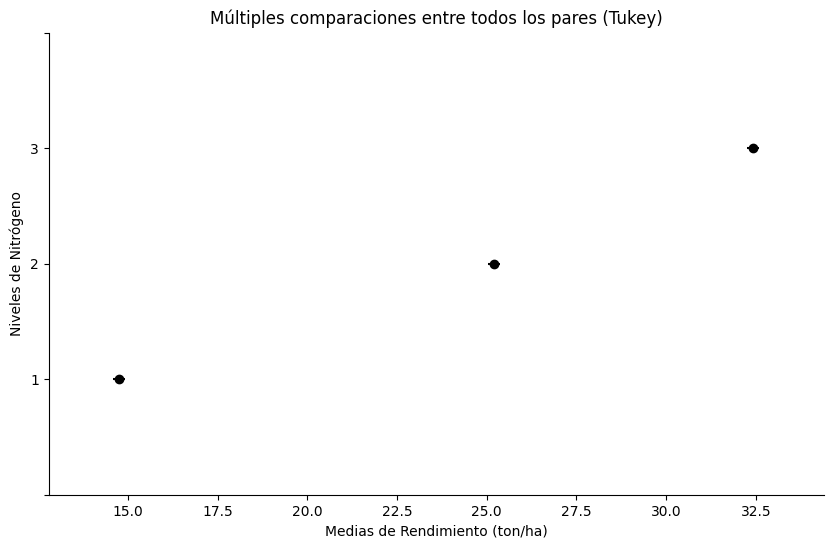

In [33]:
#PAULINA MORGAN JIMÉNEZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

tukey = pairwise_tukeyhsd(endog=df['rendimiento'], groups=df['nitrogeno'], alpha=nivel_de_significancia)

print(tukey)

tukey.plot_simultaneous(ylabel="Niveles de Nitrógeno", xlabel="Medias de Rendimiento (ton/ha)")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
plt.show()


Conclusión:  Existen diferencias significativas en los rendimientos entre los tres niveles de fertilización con nitrógeno. Cada nivel presenta un rendimiento promedio distinto y significativamente mayor conforme aumenta la cantidad de nitrógeno aplicado. Esto sugiere que incrementar la fertilización nitrogenada mejora significativamente el rendimiento del pasto en toneladas por hectárea.

8. Un químico del departamento de desarrollo de un laboratorio farmacéutico desea conocer cómo influye el tipo de aglutinante utilizado en tabletas de ampicilina de 500 mg en el porcentaje de friabilidad; para ello, se eligen los siguientes aglutinantes: polivinilpirrolidona (PVP), carboximetilcelulosa sódica (CMC) y grenetina (Gre). Los resultados del diseño experimental son los siguientes:

| Aglutinante | % de friabilidad          |
|-------------|---------------------------|
| PVP         | 0.485, 0.250, 0.073, 0.205, 0.161 |
| CMC         | 9.64, 9.37, 9.53, 9.86, 9.79       |
| Gre         | 0.289, 0.275, 0.612, 0.152, 0.137  |


In [34]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO

datos = '''
aglutiante,friabilidad
PVP,0.485
PVP,0.250
PVP,0.073
PVP,0.205
PVP,0.161
CMC,9.64
CMC,9.37
CMC,9.53
CMC,9.86
CMC,9.79
Gre,0.289
Gre,0.275
Gre,0.612
Gre,0.152
Gre,0.137
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df


,aglutiante,friabilidad
0,PVP,0.485
1,PVP,0.250
2,PVP,0.073
3,PVP,0.205
4,PVP,0.161
5,CMC,9.640
6,CMC,9.370
7,CMC,9.530
8,CMC,9.860
9,CMC,9.790


In [35]:
#PAULINA MORGAN JIMÉNEZ
import scipy.stats as stats

nivel_de_significancia = 0.05

anova_result = stats.f_oneway(
    df[df['aglutiante'] == 'PVP']['friabilidad'],
    df[df['aglutiante'] == 'CMC']['friabilidad'],
    df[df['aglutiante'] == 'Gre']['friabilidad']
)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")


Resultados del ANOVA:
F-Estadístico: 4420.97
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   CMC    Gre   -9.345   0.0 -9.6521 -9.0379   True
   CMC    PVP  -9.4032   0.0 -9.7103 -9.0961   True
   Gre    PVP  -0.0582  0.87 -0.3653  0.2489  False
---------------------------------------------------


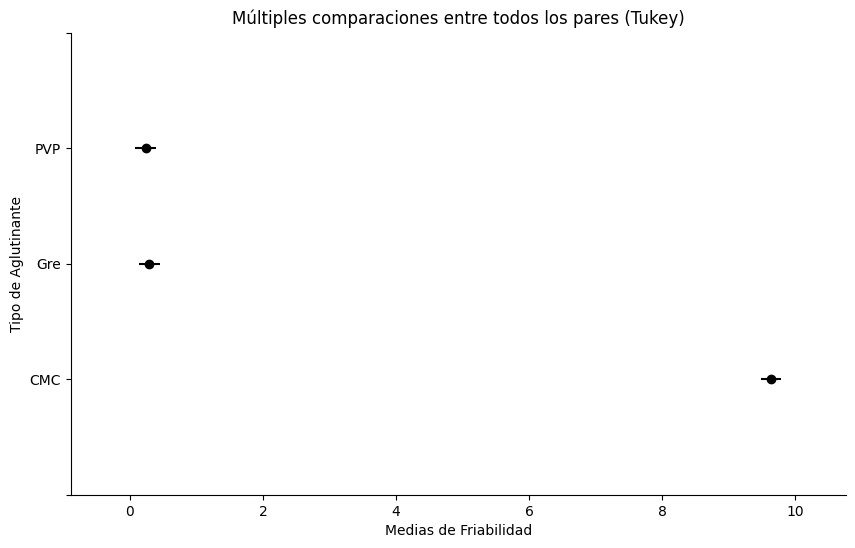

In [36]:
#PAULINA MORGAN JIMÉNEZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

tukey = pairwise_tukeyhsd(endog=df['friabilidad'], groups=df['aglutiante'], alpha=nivel_de_significancia)

print(tukey)

tukey.plot_simultaneous(ylabel="Tipo de Aglutinante", xlabel="Medias de Friabilidad")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
plt.show()


Conclusión: El aglutinante CMC produce una friabilidad significativamente mayor que PVP y Grenetina, mientras que PVP y Grenetina no difieren entre sí. Por lo tanto, el tipo de aglutinante afecta la friabilidad de las tabletas, siendo CMC el que genera mayor fragilidad.

9. Se cultivaron cuatro diferentes clonas de *agave tequilana* bajo un mismo esquema de manejo. Se quiere saber qué clona es la que responde mejor a dicho manejo, evaluando el nivel de respuesta con el porcentaje de azúcares reductores totales en base húmeda. Los datos se muestran a continuación:

| Clona | Porcentaje de azúcares reductores totales |
|-------|------------------------------------------|
| 1     | 8.69, 6.68, 6.83, 6.43, 10.30            |
| 2     | 8.00, 16.41, 12.43, 10.99, 15.53         |
| 3     | 17.39, 13.73, 15.62, 17.05, 15.42        |
| 4     | 10.37, 9.16, 8.83, 4.40, 10.38           |


In [37]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO

datos = '''
clona,azucares
1,8.69
1,6.68
1,6.83
1,6.43
1,10.30
2,8.00
2,16.41
2,12.43
2,10.99
2,15.53
3,17.39
3,13.73
3,15.62
3,17.05
3,15.42
4,10.37
4,9.16
4,8.83
4,4.40
4,10.38
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df


,clona,azucares
0,1,8.69
1,1,6.68
2,1,6.83
3,1,6.43
4,1,10.30
5,2,8.00
6,2,16.41
7,2,12.43
8,2,10.99
9,2,15.53


In [38]:
#PAULINA MORGAN JIMÉNEZ
import scipy.stats as stats

nivel_de_significancia = 0.05

anova_result = stats.f_oneway(
    df[df['clona'] == 1]['azucares'],
    df[df['clona'] == 2]['azucares'],
    df[df['clona'] == 3]['azucares'],
    df[df['clona'] == 4]['azucares']
)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos clonas.")
else:
    print("Conclusión: No hay diferencias significativas entre las clonas.")


Resultados del ANOVA:
F-Estadístico: 12.33
Valor p: 0.00020

Conclusión: Hay diferencias significativas entre al menos dos clonas.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2    4.886 0.0237   0.575  9.197   True
     1      3    8.056 0.0003   3.745 12.367   True
     1      4    0.842 0.9428  -3.469  5.153  False
     2      3     3.17 0.1939  -1.141  7.481  False
     2      4   -4.044 0.0699  -8.355  0.267  False
     3      4   -7.214  0.001 -11.525 -2.903   True
---------------------------------------------------


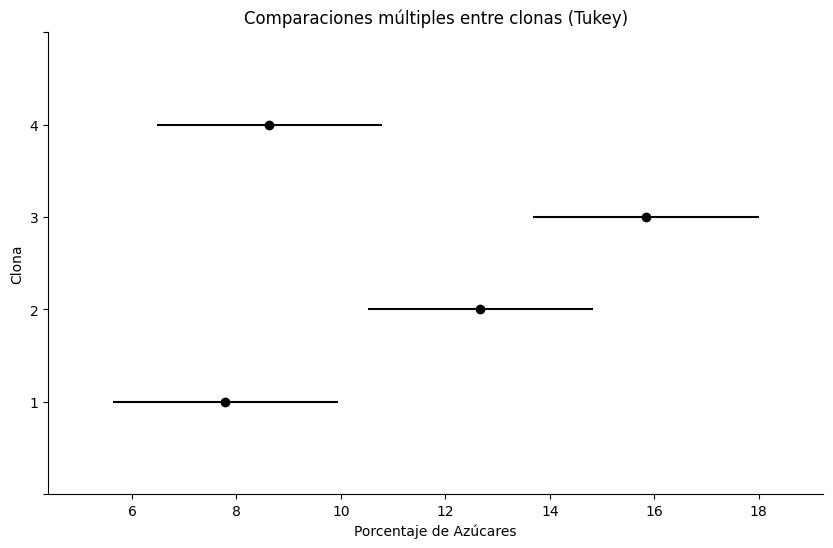

In [39]:
#PAULINA MORGAN JIMÉNEZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

if anova_result.pvalue < nivel_de_significancia:
    tukey = pairwise_tukeyhsd(endog=df['azucares'], groups=df['clona'], alpha=nivel_de_significancia)

    print(tukey)

    tukey.plot_simultaneous(ylabel="Clona", xlabel="Porcentaje de Azúcares")
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.title("Comparaciones múltiples entre clonas (Tukey)")
    plt.show()
else:
    print("No se realiza test de Tukey porque ANOVA no mostró diferencias significativas.")


Conclusión: El test de Tukey mostró que las clonas 1 y 4 son bastante parecidas entre sí, y lo mismo pasa con las clonas 2 y 3. Pero sí hay diferencias claras entre esos dos grupos. Por eso, las clonas 2 y 3 parecen responder mejor al manejo, ya que tienen un porcentaje más alto de azúcares reductores.



10. Uno de los defectos que causan mayor desperdicio en la manufactura de discos ópticos compactos son los llamados “cometas”. Típicamente, se trata de una partícula que opone resistencia al fluido en la etapa de entintado. Se quiere comprobar de manera experimental la efectividad de un tratamiento de limpieza de partículas que está basado en fuerza centrípeta y aire ionizado. A 12 lotes de 50 CD se les aplica el tratamiento y a otros 12 lotes no se les aplica; en cada caso se mide el porcentaje de discos que presentan cometas, los resultados son los siguientes:

| Con tratamiento      | Sin tratamiento      |
|----------------------|----------------------|
| 5.30   | 8.02  |
| 4.03   | 13.18 |
| 4.00   | 7.15  |
| 2.56   | 9.11  |
| 5.06   | 8.23  |
| 4.06   | 16.3  |
| 2.08   | 9.20  |
| 4.03   | 6.35  |
| 2.04   | 7.15  |
| 1.18   | 8.66  |


In [40]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO

datos = '''
tratamiento,porcentaje
Con,5.30
Con,4.03
Con,4.00
Con,2.56
Con,5.06
Con,4.06
Con,2.08
Con,4.03
Con,2.04
Con,1.18
Sin,8.02
Sin,13.18
Sin,7.15
Sin,9.11
Sin,8.23
Sin,16.3
Sin,9.20
Sin,6.35
Sin,7.15
Sin,8.66
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)
df


,tratamiento,porcentaje
0,Con,5.30
1,Con,4.03
2,Con,4.00
3,Con,2.56
4,Con,5.06
5,Con,4.06
6,Con,2.08
7,Con,4.03
8,Con,2.04
9,Con,1.18


In [41]:
#PAULINA MORGAN JIMÉNEZ
import scipy.stats as stats

nivel_de_significancia = 0.05

anova_result = stats.f_oneway(
    df[df['tratamiento'] == 'Con']['porcentaje'],
    df[df['tratamiento'] == 'Sin']['porcentaje']
)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los grupos con y sin tratamiento.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")


Resultados del ANOVA:
F-Estadístico: 30.61
Valor p: 0.00003

Conclusión: Hay diferencias significativas entre los grupos con y sin tratamiento.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
   Con    Sin    5.901   0.0  3.66 8.142   True
-----------------------------------------------


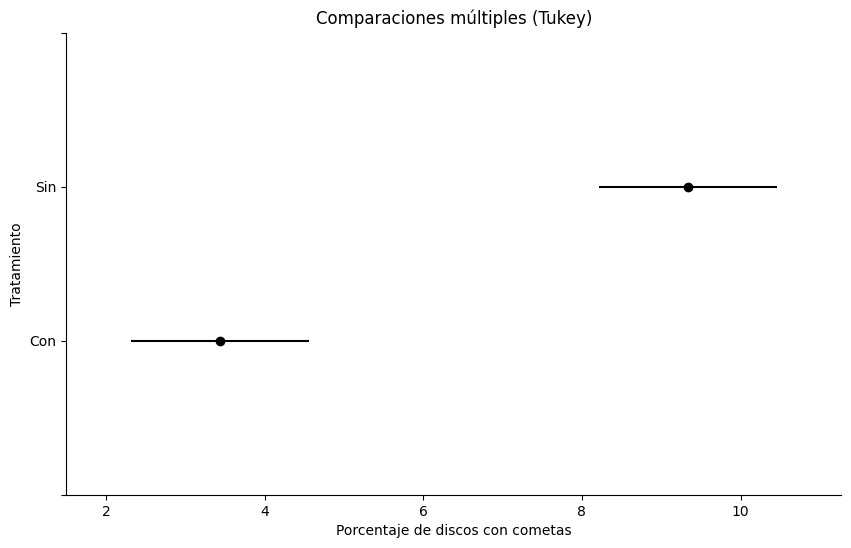

In [42]:
# PAULINA MORGAN JIMÉNEZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

if anova_result.pvalue < nivel_de_significancia:
    tukey = pairwise_tukeyhsd(endog=df['porcentaje'], groups=df['tratamiento'], alpha=nivel_de_significancia)

    print(tukey)

    tukey.plot_simultaneous(ylabel="Tratamiento", xlabel="Porcentaje de discos con cometas")
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.title("Comparaciones múltiples (Tukey)")
    plt.show()
else:
    print("No se realiza test de Tukey porque ANOVA no mostró diferencias significativas.")


Conclusión: La gráfica de Tukey mostró que hay una diferencia clara entre los grupos con tratamiento y sin tratamiento. Los discos con tratamiento tienen un porcentaje mucho más bajo de cometas (cerca de 0), mientras que los que no recibieron tratamiento tienen un porcentaje más alto, alrededor de 10. Esto indica que el tratamiento es efectivo para reducir los defectos.